# In continuation to Notebook 1 - EDA

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import math
from math import radians, sin, cos, acos

from scipy import stats
import random

In [273]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [336]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [274]:
X_train = pd.read_csv('Xtrain1.csv')
X_test = pd.read_csv('Xtest1.csv')
y_train = pd.read_csv('ytrain1.csv')
y_test = pd.read_csv('ytest1.csv')

In [275]:
X_train.head()

,Unnamed: 0,Delivery_person_Age,Weather conditions,Vehicle_condition,Type_of_order,Type_of_vehicle,Festival,City,Review,Road_traffic_density_Imputed,multiple_deliveries_imputed,Order_timeDiff_imputed,Delivery_Distance(kms)_capped
0,31575,21.0,Sandstorms,0.0,Snack,motorcycle,No,Metropolitian,Good,0.0,1.0,15.0,1.55
1,21817,30.0,Cloudy,1.0,Drinks,scooter,No,Metropolitian,Good,3.0,0.0,10.0,19.76
2,20688,25.0,Stormy,2.0,Snack,electric_scooter,No,Metropolitian,Very Good,1.0,0.0,10.0,10.87
3,11376,25.0,Sandstorms,0.0,Drinks,motorcycle,No,Urban,Very Good,0.0,0.0,5.0,8.94
4,40629,27.0,Windy,0.0,Buffet,motorcycle,No,Urban,Good,1.0,0.0,10.0,13.83


In [276]:
X_test.head()

,Unnamed: 0,Delivery_person_Age,Weather conditions,Vehicle_condition,Type_of_order,Type_of_vehicle,Festival,City,Review,Road_traffic_density_Imputed,multiple_deliveries_imputed,Order_timeDiff_imputed,Delivery_Distance(kms)_capped
0,28805,33.0,Cloudy,1.0,Drinks,motorcycle,No,Metropolitian,Very Good,0.0,0.0,5.0,9.44
1,2850,30.0,Sunny,2.0,Snack,scooter,No,Urban,Very Good,0.0,0.0,10.0,7.72
2,42245,28.0,Cloudy,1.0,Drinks,motorcycle,No,Urban,Very Good,0.0,1.0,10.0,10.91
3,40135,31.0,Stormy,2.0,Meal,electric_scooter,No,Metropolitian,Good,2.0,1.0,15.0,6.21
4,20131,24.0,Cloudy,0.0,Drinks,motorcycle,No,Metropolitian,Very Good,1.0,2.0,5.0,14.02


In [277]:
X_train = X_train.set_index('Unnamed: 0')
X_test = X_test.set_index('Unnamed: 0')

In [278]:
X_train.head()

,Delivery_person_Age,Weather conditions,Vehicle_condition,Type_of_order,Type_of_vehicle,Festival,City,Review,Road_traffic_density_Imputed,multiple_deliveries_imputed,Order_timeDiff_imputed,Delivery_Distance(kms)_capped
Unnamed: 0,,,,,,,,,,,,
31575,21.0,Sandstorms,0.0,Snack,motorcycle,No,Metropolitian,Good,0.0,1.0,15.0,1.55
21817,30.0,Cloudy,1.0,Drinks,scooter,No,Metropolitian,Good,3.0,0.0,10.0,19.76
20688,25.0,Stormy,2.0,Snack,electric_scooter,No,Metropolitian,Very Good,1.0,0.0,10.0,10.87
11376,25.0,Sandstorms,0.0,Drinks,motorcycle,No,Urban,Very Good,0.0,0.0,5.0,8.94
40629,27.0,Windy,0.0,Buffet,motorcycle,No,Urban,Good,1.0,0.0,10.0,13.83


In [279]:
X_test.head()

,Delivery_person_Age,Weather conditions,Vehicle_condition,Type_of_order,Type_of_vehicle,Festival,City,Review,Road_traffic_density_Imputed,multiple_deliveries_imputed,Order_timeDiff_imputed,Delivery_Distance(kms)_capped
Unnamed: 0,,,,,,,,,,,,
28805,33.0,Cloudy,1.0,Drinks,motorcycle,No,Metropolitian,Very Good,0.0,0.0,5.0,9.44
2850,30.0,Sunny,2.0,Snack,scooter,No,Urban,Very Good,0.0,0.0,10.0,7.72
42245,28.0,Cloudy,1.0,Drinks,motorcycle,No,Urban,Very Good,0.0,1.0,10.0,10.91
40135,31.0,Stormy,2.0,Meal,electric_scooter,No,Metropolitian,Good,2.0,1.0,15.0,6.21
20131,24.0,Cloudy,0.0,Drinks,motorcycle,No,Metropolitian,Very Good,1.0,2.0,5.0,14.02


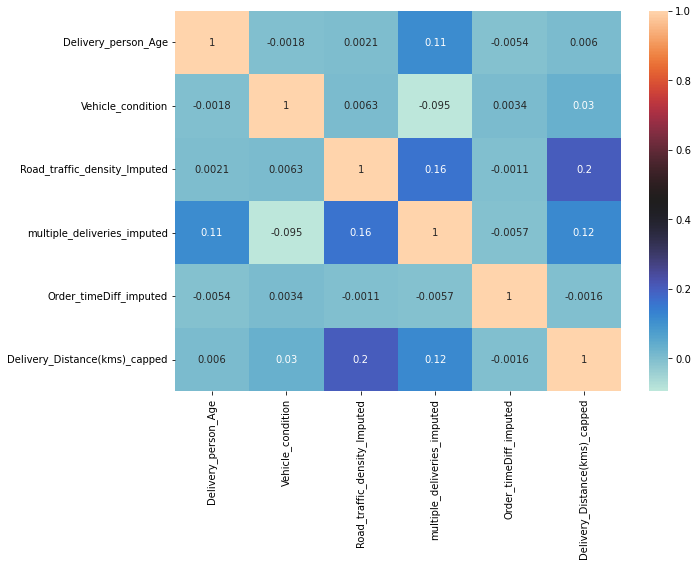

In [280]:
# Checking correlation of columns within themselves for multi-colinearity
plt.figure(figsize=(10,7))
cor1 = X_train.corr()
sns.heatmap(cor1,annot=True,cmap = 'icefire')
plt.show()

- Features are not highly collinear with each other. 
- Hence, the features can be considered as Independent Features.

## Encoding Categorical Data 

### Ordinal Encoding Column 'Review'

- Review is ordinal data as Excellent is the best review and Very Bad is the worst review.
- Hence we will perform ordinal encoding on Review column

In [281]:
X_train['Review'].unique()

array(['Good', 'Very Good', 'Bad', 'Excellent', 'Very Bad'], dtype=object)

In [282]:
oe = OrdinalEncoder(categories=[['Very Bad','Bad','Good','Very Good','Excellent']])

In [283]:
X_train_review = oe.fit_transform(X_train[['Review']])
X_test_review = oe.transform(X_test[['Review']])

In [284]:
X_train['Review_Encoded'] = X_train_review 
X_test['Review_Encoded'] = X_test_review

In [285]:
X_train.head()

,Delivery_person_Age,Weather conditions,Vehicle_condition,Type_of_order,Type_of_vehicle,Festival,City,Review,Road_traffic_density_Imputed,multiple_deliveries_imputed,Order_timeDiff_imputed,Delivery_Distance(kms)_capped,Review_Encoded
Unnamed: 0,,,,,,,,,,,,,
31575,21.0,Sandstorms,0.0,Snack,motorcycle,No,Metropolitian,Good,0.0,1.0,15.0,1.55,2.0
21817,30.0,Cloudy,1.0,Drinks,scooter,No,Metropolitian,Good,3.0,0.0,10.0,19.76,2.0
20688,25.0,Stormy,2.0,Snack,electric_scooter,No,Metropolitian,Very Good,1.0,0.0,10.0,10.87,3.0
11376,25.0,Sandstorms,0.0,Drinks,motorcycle,No,Urban,Very Good,0.0,0.0,5.0,8.94,3.0
40629,27.0,Windy,0.0,Buffet,motorcycle,No,Urban,Good,1.0,0.0,10.0,13.83,2.0


In [286]:
X_test.head()

,Delivery_person_Age,Weather conditions,Vehicle_condition,Type_of_order,Type_of_vehicle,Festival,City,Review,Road_traffic_density_Imputed,multiple_deliveries_imputed,Order_timeDiff_imputed,Delivery_Distance(kms)_capped,Review_Encoded
Unnamed: 0,,,,,,,,,,,,,
28805,33.0,Cloudy,1.0,Drinks,motorcycle,No,Metropolitian,Very Good,0.0,0.0,5.0,9.44,3.0
2850,30.0,Sunny,2.0,Snack,scooter,No,Urban,Very Good,0.0,0.0,10.0,7.72,3.0
42245,28.0,Cloudy,1.0,Drinks,motorcycle,No,Urban,Very Good,0.0,1.0,10.0,10.91,3.0
40135,31.0,Stormy,2.0,Meal,electric_scooter,No,Metropolitian,Good,2.0,1.0,15.0,6.21,2.0
20131,24.0,Cloudy,0.0,Drinks,motorcycle,No,Metropolitian,Very Good,1.0,2.0,5.0,14.02,3.0


In [287]:
X_train.drop(columns=['Review'],inplace=True)
X_test.drop(columns=['Review'],inplace=True)

In [288]:
X_train= X_train.reset_index()
X_test = X_test.reset_index()

### One Hot Encoding Columns Weather conditions, Type_of_order, Type_of_vehicle, Festival,City
- The mentioned columns are Nominal Categorical column hence there is no rank or order.

In [289]:
X_train.columns

Index(['Unnamed: 0', 'Delivery_person_Age', 'Weather conditions',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle', 'Festival',
       'City', 'Road_traffic_density_Imputed', 'multiple_deliveries_imputed',
       'Order_timeDiff_imputed', 'Delivery_Distance(kms)_capped',
       'Review_Encoded'],
      dtype='object')

In [290]:
ohe = OneHotEncoder(drop='first',sparse=False)  # drop='first' to ensure no collinearity is induced in the features
                                                # dropping one category breaks the symmetry of the original representation

In [291]:
X_train_ohe = ohe.fit_transform(X_train[['Weather conditions','Type_of_order','Type_of_vehicle','Festival','City']])
X_test_ohe = ohe.fit_transform(X_test[['Weather conditions','Type_of_order','Type_of_vehicle','Festival','City']])

In [292]:
X_train_ohe

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [293]:
X_test_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [294]:
X_train1 = X_train.copy()
X_test1 = X_test.copy()

In [295]:
X_train.drop(columns=['Weather conditions','Type_of_order','Type_of_vehicle','Festival','City'],inplace=True)
X_test.drop(columns=['Weather conditions','Type_of_order','Type_of_vehicle','Festival','City'],inplace=True)

In [296]:
X_train_ohe = pd.DataFrame(X_train_ohe)
X_test_ohe = pd.DataFrame(X_test_ohe)

In [297]:
X_train_ohe.shape

(36474, 15)

In [298]:
X_test_ohe.shape

(9119, 15)

In [299]:
X_train2 = X_train.join(X_train_ohe)
X_test2 = X_test.join(X_test_ohe)

In [300]:
X_train2.head()

,Unnamed: 0,Delivery_person_Age,Vehicle_condition,Road_traffic_density_Imputed,multiple_deliveries_imputed,Order_timeDiff_imputed,Delivery_Distance(kms)_capped,Review_Encoded,0,1,...,5,6,7,8,9,10,11,12,13,14
0,31575,21.0,0.0,0.0,1.0,15.0,1.55,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,21817,30.0,1.0,3.0,0.0,10.0,19.76,2.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,20688,25.0,2.0,1.0,0.0,10.0,10.87,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,11376,25.0,0.0,0.0,0.0,5.0,8.94,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,40629,27.0,0.0,1.0,0.0,10.0,13.83,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [301]:
X_train2.shape

(36474, 23)

In [302]:
X_test2.shape

(9119, 23)

In [303]:
X_train2.head()

,Unnamed: 0,Delivery_person_Age,Vehicle_condition,Road_traffic_density_Imputed,multiple_deliveries_imputed,Order_timeDiff_imputed,Delivery_Distance(kms)_capped,Review_Encoded,0,1,...,5,6,7,8,9,10,11,12,13,14
0,31575,21.0,0.0,0.0,1.0,15.0,1.55,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
1,21817,30.0,1.0,3.0,0.0,10.0,19.76,2.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,20688,25.0,2.0,1.0,0.0,10.0,10.87,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,11376,25.0,0.0,0.0,0.0,5.0,8.94,3.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,40629,27.0,0.0,1.0,0.0,10.0,13.83,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [304]:
X_test2.head()

,Unnamed: 0,Delivery_person_Age,Vehicle_condition,Road_traffic_density_Imputed,multiple_deliveries_imputed,Order_timeDiff_imputed,Delivery_Distance(kms)_capped,Review_Encoded,0,1,...,5,6,7,8,9,10,11,12,13,14
0,28805,33.0,1.0,0.0,0.0,5.0,9.44,3.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2850,30.0,2.0,0.0,0.0,10.0,7.72,3.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,42245,28.0,1.0,0.0,1.0,10.0,10.91,3.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,40135,31.0,2.0,2.0,1.0,15.0,6.21,2.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,20131,24.0,0.0,1.0,2.0,5.0,14.02,3.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Feature Scaling

In [305]:
# Checking skewness for scaling the data.
Num_col = X_train[['Delivery_person_Age','Vehicle_condition','Road_traffic_density_Imputed','multiple_deliveries_imputed','Order_timeDiff_imputed','Delivery_Distance(kms)_capped']]
for i in Num_col.columns:
    print(i,"=====>",Num_col[i].skew())

Delivery_person_Age =====> 0.014651946810421175
Vehicle_condition =====> 0.0705012653869513
Road_traffic_density_Imputed =====> 0.2194758489969138
multiple_deliveries_imputed =====> 0.2974541279255771
Order_timeDiff_imputed =====> 0.015503744884405445
Delivery_Distance(kms)_capped =====> 0.4672346593332976


### Standardization using Standard Scaler 
- As the data is Normal or Close to Normal Distribution

In [306]:
ss = StandardScaler()

In [307]:
X_train_ss = ss.fit_transform(X_train[['Delivery_person_Age','Order_timeDiff_imputed','Delivery_Distance(kms)_capped']])
X_test_ss = ss.transform(X_test[['Delivery_person_Age','Order_timeDiff_imputed','Delivery_Distance(kms)_capped']])

In [308]:
X_train_ss = pd.DataFrame(X_train_ss,columns=['Delivery_person_Age','Order_timeDiff_imputed','Delivery_Distance(kms)_capped'])
X_test_ss = pd.DataFrame(X_test_ss,columns=['Delivery_person_Age','Order_timeDiff_imputed','Delivery_Distance(kms)_capped'])

In [309]:
X_train_ss.head()

,Delivery_person_Age,Order_timeDiff_imputed,Delivery_Distance(kms)_capped
0,-1.504477,1.248944,-1.429581
1,0.076991,0.007995,1.683480
2,-0.801602,0.007995,0.163705
3,-0.801602,-1.232954,-0.166235
4,-0.450165,0.007995,0.669727


In [310]:
X_train2.drop(columns=['Delivery_person_Age','Order_timeDiff_imputed','Delivery_Distance(kms)_capped'],inplace=True)
X_test2.drop(columns=['Delivery_person_Age','Order_timeDiff_imputed','Delivery_Distance(kms)_capped'],inplace=True)

In [311]:
X_train_final_ss = X_train2.join(X_train_ss)
X_test_final_ss = X_test2.join(X_test_ss)

In [312]:
X_train_final_ss.head()

,Unnamed: 0,Vehicle_condition,Road_traffic_density_Imputed,multiple_deliveries_imputed,Review_Encoded,0,1,2,3,4,...,8,9,10,11,12,13,14,Delivery_person_Age,Order_timeDiff_imputed,Delivery_Distance(kms)_capped
0,31575,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.504477,1.248944,-1.429581
1,21817,1.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.076991,0.007995,1.683480
2,20688,2.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.801602,0.007995,0.163705
3,11376,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.801602,-1.232954,-0.166235
4,40629,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.450165,0.007995,0.669727


In [313]:
X_test_final.head()

,Vehicle_condition,Road_traffic_density_Imputed,multiple_deliveries_imputed,Review_Encoded,0,1,2,3,4,5,...,8,9,10,11,12,13,14,Delivery_person_Age,Order_timeDiff_imputed,Delivery_Distance(kms)_capped
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
28805,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.604147,-1.232954,-0.080758
2850,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.076991,0.007995,-0.374798
42245,1.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.274446,0.007995,0.170543
40135,2.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.252710,1.248944,-0.632938
20131,0.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.977321,-1.232954,0.702208


In [314]:
X_train_final.head()

,Vehicle_condition,Road_traffic_density_Imputed,multiple_deliveries_imputed,Review_Encoded,0,1,2,3,4,5,...,8,9,10,11,12,13,14,Delivery_person_Age,Order_timeDiff_imputed,Delivery_Distance(kms)_capped
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
31575,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,-1.504477,1.248944,-1.429581
21817,1.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.076991,0.007995,1.683480
20688,2.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,-0.801602,0.007995,0.163705
11376,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.801602,-1.232954,-0.166235
40629,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.450165,0.007995,0.669727


### Normalization using MinMaxScaler 
- The scale of the data will be in range[0,1] as other features are also in the range above 0.
- Standardization is mean centring the data hence by doing so we will get some negative value which changes the data scale.
- Hence we would be doing Normalization for modelling.

In [315]:
mm = MinMaxScaler()

In [316]:
X_train_mm = mm.fit_transform(X_train[['Delivery_person_Age','Order_timeDiff_imputed','Delivery_Distance(kms)_capped']])
X_test_mm = mm.transform(X_test[['Delivery_person_Age','Order_timeDiff_imputed','Delivery_Distance(kms)_capped']])

In [317]:
X_train_mm = pd.DataFrame(X_train_mm,columns=['Delivery_person_Age','Order_timeDiff_imputed','Delivery_Distance(kms)_capped'])
X_test_mm = pd.DataFrame(X_test_mm,columns=['Delivery_person_Age','Order_timeDiff_imputed','Delivery_Distance(kms)_capped'])

In [318]:
X_train_final_mm = X_train2.join(X_train_mm)
X_test_final_mm = X_test2.join(X_test_mm)

In [319]:
X_train_final_mm.head()

,Unnamed: 0,Vehicle_condition,Road_traffic_density_Imputed,multiple_deliveries_imputed,Review_Encoded,0,1,2,3,4,...,8,9,10,11,12,13,14,Delivery_person_Age,Order_timeDiff_imputed,Delivery_Distance(kms)_capped
0,31575,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.171429,1.0,0.003084
1,21817,1.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.428571,0.5,0.705089
2,20688,2.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.5,0.362375
3,11376,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.285714,0.0,0.287972
4,40629,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.342857,0.5,0.476484


In [320]:
X_train_final = X_train_final_mm.set_index('Unnamed: 0')
X_test_final = X_test_final_mm.set_index('Unnamed: 0')

In [321]:
y_train = y_train.set_index('Unnamed: 0')
y_test = y_test.set_index('Unnamed: 0')

## Modelling

In [327]:
X_train_final.head()

,Vehicle_condition,Road_traffic_density_Imputed,multiple_deliveries_imputed,Review_Encoded,0,1,2,3,4,5,...,8,9,10,11,12,13,14,Delivery_person_Age,Order_timeDiff_imputed,Delivery_Distance(kms)_capped
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
31575,0.0,0.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.171429,1.0,0.003084
21817,1.0,3.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.428571,0.5,0.705089
20688,2.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.285714,0.5,0.362375
11376,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.285714,0.0,0.287972
40629,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.342857,0.5,0.476484


In [325]:
y_train.head()

,Time_taken (min)
Unnamed: 0,
31575,22.0
21817,48.0
20688,18.0
11376,17.0
40629,33.0


In [328]:
X_test_final.head()

,Vehicle_condition,Road_traffic_density_Imputed,multiple_deliveries_imputed,Review_Encoded,0,1,2,3,4,5,...,8,9,10,11,12,13,14,Delivery_person_Age,Order_timeDiff_imputed,Delivery_Distance(kms)_capped
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
28805,1.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.514286,0.0,0.307247
2850,2.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.428571,0.5,0.240941
42245,1.0,0.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.371429,0.5,0.363917
40135,2.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.457143,1.0,0.182729
20131,0.0,1.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.257143,0.0,0.483809


In [326]:
y_test.head()

,Time_taken (min)
Unnamed: 0,
28805,15.0
2850,13.0
42245,29.0
40135,31.0
20131,33.0


In [330]:
lr = LinearRegression()

In [332]:
lr.fit(X_train_final,y_train)

LinearRegression()

In [333]:
lr.coef_  #Weights

array([[-2.22245426,  2.33575018,  3.11768726, -3.69015084,  0.1877615 ,
         0.23324498, -2.75415049, -2.68386607, -6.14404211, -2.63338573,
        -0.03661891,  0.04175066,  0.0342312 ,  0.5868146 ,  0.16064992,
        -0.37036726,  6.17961609, 10.36983883, -2.05660522, 13.73315439,
        -0.06237335,  7.61263034]])

In [335]:
lr.intercept_  #offset 

array([27.9371086])

In [338]:
y_pred = lr.predict(X_test_final)

In [339]:
y_pred

array([[24.35772103],
       [11.57360705],
       [23.85713915],
       ...,
       [32.09787423],
       [18.50565606],
       [25.45334269]])

In [340]:
y_test

,Time_taken (min)
Unnamed: 0,
28805,15.0
2850,13.0
42245,29.0
40135,31.0
20131,33.0
...,...
27061,15.0
12522,33.0
10307,38.0


In [358]:
print("MAE",mean_absolute_error(y_test,y_pred))
print("MSE",mean_squared_error(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2 score",r2_score(y_test,y_pred))

MAE 4.905066073147671
MSE 38.034353398907584
RMSE 6.1671998020907015
R2 score 0.5680821926119


In [344]:
X_test.shape

(9119, 8)

In [349]:
r2 = r2_score(y_test,y_pred)
adj_r2 = 1 - ((1-r2)*(9119-1))/(9119-1-8)  

In [350]:
print("Adjusted R2 score:",adj_r2)

Adjusted R2 score: 0.5677029014528325


## Checking accuracy with StandardScaler

In [351]:
lr1 = LinearRegression()

In [352]:
lr1.fit(X_train_final_ss,y_train)

LinearRegression()

In [353]:
y_pred1 = lr1.predict(X_test_final_ss)

In [357]:
print("MAE",mean_absolute_error(y_test,y_pred1))
print("MSE",mean_squared_error(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2 score",r2_score(y_test,y_pred1))

MAE 4.904782168093078
MSE 38.03319523976697
RMSE 6.167105904698489
R2 score 0.568095344657667


In [355]:
r2 = r2_score(y_test,y_pred1)
adj_r2 = 1 - ((1-r2)*(9119-1))/(9119-1-8)  

In [356]:
adj_r2

0.5677160650481456